In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

In [2]:
#Importing data into dataframes
HOF_Batting = pd.read_csv('Output/sorted_hof_pp_rs_stats.csv')
HOF_Post_Batting = pd.read_csv('Output/sorted_hof_pp_ps_stats.csv')
Post_Batting = pd.read_csv('Output/sorted_pp_ps_stats.csv')
Reg_Batting = pd.read_csv('Output/sorted_pp_rs_stats.csv')


In [3]:
#We want to eliminate players with too few at bats and no real statistics for regular season and post-season
HOF_Batting = HOF_Batting.loc[HOF_Batting['AB'] >= 50]
HOF_Post_Batting = HOF_Post_Batting.loc[HOF_Post_Batting['AB'] >= 1]
Post_Batting = Post_Batting.loc[Post_Batting['AB'] >= 1]
Reg_Batting = Reg_Batting.loc[Reg_Batting['AB'] >= 50]

# Creating Decades column for each dataset

In [72]:
#Create decades column for Regular Season Batting
conditions = [(Reg_Batting["yearID"] >= 1950) & (Reg_Batting['yearID'] < 1960), 
              (Reg_Batting["yearID"] >= 1960) & (Reg_Batting["yearID"] < 1970),
               (Reg_Batting["yearID"] >= 1970) & (Reg_Batting["yearID"] < 1980), 
              (Reg_Batting["yearID"] >= 1980) & (Reg_Batting["yearID"] < 1990),
               (Reg_Batting["yearID"] >= 1990) & (Reg_Batting["yearID"] < 2000),
              (Reg_Batting["yearID"] >= 2000) & (Reg_Batting["yearID"] < 2010),
               Reg_Batting["yearID"] < 2020
             ]
choices     = ['1950', '1960', '1970','1980', '1990','2000', '2010']
Reg_Batting["Decade"] = np.select(conditions, choices, default=np.nan)
#Reg_Batting.head()

In [5]:
#Create decades column for Hall of Fame regular season batting
conditions = [(HOF_Batting["yearID"] >= 1950) & (HOF_Batting['yearID'] < 1960), (HOF_Batting["yearID"] >= 1960) & (HOF_Batting["yearID"] < 1970),
               (HOF_Batting["yearID"] >= 1970) & (HOF_Batting["yearID"] < 1980), (HOF_Batting["yearID"] >= 1980) & (HOF_Batting["yearID"] < 1990),
               (HOF_Batting["yearID"] >= 1990) & (HOF_Batting["yearID"] < 2000), (HOF_Batting["yearID"] >= 2000) & (HOF_Batting["yearID"] < 2010),
               HOF_Batting["yearID"] < 2020
             ]
choices     = ['1950', '1960', '1970','1980', '1990','2000', '2010']
HOF_Batting["Decade"] = np.select(conditions, choices, default=np.nan)
#HOF_Batting

In [6]:
#Create decades column for Post Season Batting
conditions = [ (Post_Batting["yearID"] >= 1950) & (Post_Batting['yearID'] < 1960), (Post_Batting["yearID"] >= 1960) & (Post_Batting["yearID"] < 1970),
               (Post_Batting["yearID"] >= 1970) & (Post_Batting["yearID"] < 1980), (Post_Batting["yearID"] >= 1980) & (Post_Batting["yearID"] < 1990),
               (Post_Batting["yearID"] >= 1990) & (Post_Batting["yearID"] < 2000), (Post_Batting["yearID"] >= 2000) & (Post_Batting["yearID"] < 2010),
               Post_Batting["yearID"] < 2020
             ]
choices     = ['1950', '1960', '1970','1980', '1990','2000', '2010']
Post_Batting["Decade"] = np.select(conditions, choices, default=np.nan)
#Post_Batting

In [7]:
#Create decades column for Hall of Fame Post-season Batting
conditions = [(HOF_Post_Batting["yearID"] >= 1950) & (HOF_Post_Batting['yearID'] < 1960), (HOF_Post_Batting["yearID"] >= 1960) & (HOF_Post_Batting["yearID"] < 1970),
               (HOF_Post_Batting["yearID"] >= 1970) & (HOF_Post_Batting["yearID"] < 1980), (HOF_Post_Batting["yearID"] >= 1980) & (HOF_Post_Batting["yearID"] < 1990),
               (HOF_Post_Batting["yearID"] >= 1990) & (HOF_Post_Batting["yearID"] < 2000), (HOF_Post_Batting["yearID"] >= 2000) & (HOF_Post_Batting["yearID"] < 2010),
               HOF_Post_Batting["yearID"] < 2020
             ]
choices     = ['1950', '1960', '1970','1980', '1990','2000', '2010']
HOF_Post_Batting["Decade"] = np.select(conditions, choices, default=np.nan)
#HOF_Post_Batting

# Aggregating stats by Decade for HOF/ALL and regular season/ post-season


In [8]:
#Using GroupBy playerID to aggregate statistics by the decade
decade_Reg_Batting = Reg_Batting.groupby(['Decade']).agg({
             'G': 'sum',
             'AB' : 'sum',
             'R': 'sum',
             'H' : 'sum',
             '2B':'sum',
             '3B' :'sum',
             'HR': 'sum',
             'RBI': 'sum',
             'BB' :'sum',
             'IBB': 'sum',
             'HBP':'sum',
}).reset_index()
#decade_Reg_Batting.head()

In [9]:
#Using GroupBy playerID to aggregate statistics by the decade
decade_Post_Batting = Post_Batting.groupby(['Decade']).agg({
             'G': 'sum',
             'AB' : 'sum',
             'R': 'sum',
             'H' : 'sum',
             '2B':'sum',
             '3B' :'sum',
             'HR': 'sum',
             'RBI': 'sum',
             'BB' :'sum',
             'IBB': 'sum',
             'HBP':'sum',
}).reset_index()
#decade_Post_Batting.head()

In [10]:
#Using GroupBy playerID to aggregate statistics by the decade
decade_HOF_Batting = HOF_Batting.groupby(['Decade']).agg({
             'G': 'sum',
             'AB' : 'sum',
             'R': 'sum',
             'H' : 'sum',
             '2B':'sum',
             '3B' :'sum',
             'HR': 'sum',
             'RBI': 'sum',
             'BB' :'sum',
             'IBB': 'sum',
             'HBP':'sum',
}).reset_index()
#decade_HOF_Batting.head()

In [11]:
#Using GroupBy playerID to aggregate statistics by the decade
decade_HOF_Post_Batting = HOF_Post_Batting.groupby(['Decade']).agg({
             'G': 'sum',
             'AB' : 'sum',
             'R': 'sum',
             'H' : 'sum',
             '2B':'sum',
             '3B' :'sum',
             'HR': 'sum',
             'RBI': 'sum',
             'BB' :'sum',
             'IBB': 'sum',
             'HBP':'sum',
}).reset_index()
#decade_HOF_Post_Batting.head()

# Calculating Batting Stats (By decade and all data)


In [75]:
#Calculating Batting Average, On Base Percentage & Slugging Percentage For Decades Dataframes
decade_Reg_Batting['BA'] = decade_Reg_Batting['H'] / decade_Reg_Batting['AB']
decade_Reg_Batting['OBP'] = (
    (decade_Reg_Batting['H'] + decade_Reg_Batting['BB']  + decade_Reg_Batting['HBP']) 
    / (decade_Reg_Batting['AB'] + decade_Reg_Batting['BB']  + decade_Reg_Batting['HBP'])
                               )
decade_Reg_Batting['SLG']= ( ((decade_Reg_Batting['H'] - (decade_Reg_Batting['2B'] + decade_Reg_Batting['3B'] 
                                + decade_Reg_Batting['HR']) )
                                + 2*decade_Reg_Batting['2B'] + 3*decade_Reg_Batting['3B'] + 4*decade_Reg_Batting['HR'])
                                / (decade_Reg_Batting['AB'])
                               )
decade_Reg_Batting['OPS']= decade_Reg_Batting['SLG'] + decade_Reg_Batting['OBP']
#decade_Reg_Batting.head()

In [13]:
#Calculating Batting Average, On Base Percentage & Slugging Percentage For Decades Dataframes
decade_Post_Batting['BA'] = decade_Post_Batting['H'] / decade_Post_Batting['AB']
decade_Post_Batting['OBP'] = (
    (decade_Post_Batting['H'] + decade_Post_Batting['BB']  + decade_Post_Batting['HBP']) 
    / (decade_Post_Batting['AB'] + decade_Post_Batting['BB']  + decade_Post_Batting['HBP'])
                               )
decade_Post_Batting['SLG']= ( ((decade_Post_Batting['H'] - (decade_Post_Batting['2B'] + decade_Post_Batting['3B'] + decade_Post_Batting['HR']) )
                              + 2*decade_Post_Batting['2B'] + 3*decade_Post_Batting['3B'] + 4*decade_Post_Batting['HR'])
                            / (decade_Post_Batting['AB'])
                            )
decade_Post_Batting['OPS']= decade_Post_Batting['SLG'] + decade_Post_Batting['OBP']
#decade_Post_Batting.head()

In [14]:
#Calculating Batting Average, On Base Percentage & Slugging Percentage For Decades Dataframes
decade_HOF_Batting['BA'] = decade_HOF_Batting['H'] / decade_HOF_Batting['AB']
decade_HOF_Batting['OBP'] = (
    (decade_HOF_Batting['H'] + decade_HOF_Batting['BB']  + decade_HOF_Batting['HBP']) 
    / (decade_HOF_Batting['AB'] + decade_HOF_Batting['BB']  + decade_HOF_Batting['HBP'])
                               )
decade_HOF_Batting['SLG']= ( ((decade_HOF_Batting['H'] - (decade_HOF_Batting['2B'] + decade_HOF_Batting['3B'] + decade_HOF_Batting['HR']) )
                              + 2*decade_HOF_Batting['2B'] + 3*decade_HOF_Batting['3B'] + 4*decade_HOF_Batting['HR'])
                            / (decade_HOF_Batting['AB'])
                            )
decade_HOF_Batting['OPS']= decade_HOF_Batting['SLG'] + decade_HOF_Batting['OBP']
#decade_HOF_Batting

In [15]:
#Calculating Batting Average, On Base Percentage & Slugging Percentage For Decades Dataframes
decade_HOF_Post_Batting['BA'] = decade_HOF_Post_Batting['H'] / decade_HOF_Post_Batting['AB']
decade_HOF_Post_Batting['OBP'] = (
    (decade_HOF_Post_Batting['H'] + decade_HOF_Post_Batting['BB']  + decade_HOF_Post_Batting['HBP']) 
    / (decade_HOF_Post_Batting['AB'] + decade_HOF_Post_Batting['BB']  + decade_HOF_Post_Batting['HBP'])
                               )
decade_HOF_Post_Batting['SLG']= ( ((decade_HOF_Post_Batting['H'] - (decade_HOF_Post_Batting['2B'] + decade_HOF_Post_Batting['3B'] + decade_HOF_Post_Batting['HR']) )
                              + 2*decade_HOF_Post_Batting['2B'] + 3*decade_HOF_Post_Batting['3B'] + 4*decade_HOF_Post_Batting['HR'])
                            / (decade_HOF_Post_Batting['AB'])
                            )
decade_HOF_Post_Batting['OPS']= decade_HOF_Post_Batting['SLG'] + decade_HOF_Post_Batting['OBP']
#decade_HOF_Post_Batting

In [16]:
#Calculating Batting Average, On Base Percentage & Slugging Percentage For Regular season Dataframe
Reg_Batting['BA'] = Reg_Batting['H'] / Reg_Batting['AB']
Reg_Batting['OBP'] = (
    (Reg_Batting['H'] + Reg_Batting['BB']  + Reg_Batting['HBP']) 
    / (Reg_Batting['AB'] + Reg_Batting['BB']  + Reg_Batting['HBP'])
                               )
Reg_Batting['SLG']= ( ((Reg_Batting['H'] - (Reg_Batting['2B'] + Reg_Batting['3B'] + Reg_Batting['HR']) )
                              + 2*Reg_Batting['2B'] + 3*Reg_Batting['3B'] + 4*Reg_Batting['HR'])
                            / (Reg_Batting['AB'])
                            )
Reg_Batting['OPS']= Reg_Batting['SLG'] + Reg_Batting['OBP']
#Reg_Batting.head()

In [17]:
#Calculating Batting Average, On Base Percentage & Slugging Percentage For HOF Dataframe
HOF_Batting['BA'] = HOF_Batting['H'] / HOF_Batting['AB']
HOF_Batting['OBP'] = (
    (HOF_Batting['H'] + HOF_Batting['BB']  + HOF_Batting['HBP']) 
    / (HOF_Batting['AB'] + HOF_Batting['BB']  + HOF_Batting['HBP'])
                               )
HOF_Batting['SLG']= ( ((HOF_Batting['H'] - (HOF_Batting['2B'] + HOF_Batting['3B'] + HOF_Batting['HR']) )
                              + 2*HOF_Batting['2B'] + 3*HOF_Batting['3B'] + 4*HOF_Batting['HR'])
                            / (HOF_Batting['AB'])
                            )
HOF_Batting['OPS']= HOF_Batting['SLG'] + HOF_Batting['OBP']
#HOF_Batting.head()

In [18]:
#Calculating Batting Average, On Base Percentage & Slugging Percentage For  Postseason Dataframe
Post_Batting['BA'] = Post_Batting['H'] / Post_Batting['AB']
Post_Batting['OBP'] = (
    (Post_Batting['H'] + Post_Batting['BB']  + Post_Batting['HBP']) 
    / (Post_Batting['AB'] + Post_Batting['BB']  + Post_Batting['HBP'])
                               )
Post_Batting['SLG']= ( ((Post_Batting['H'] - (Post_Batting['2B'] + Post_Batting['3B'] + Post_Batting['HR']) )
                              + 2*Post_Batting['2B'] + 3*Post_Batting['3B'] + 4*Post_Batting['HR'])
                            / (Post_Batting['AB'])
                            )
Post_Batting['OPS']= Post_Batting['SLG'] + Post_Batting['OBP']
#Post_Batting.head()

In [19]:
#Calculating Batting Average, On Base Percentage & Slugging Percentage For HOF Postseason Dataframe
HOF_Post_Batting['BA'] = HOF_Post_Batting['H'] / HOF_Post_Batting['AB']
HOF_Post_Batting['OBP'] = (
    (HOF_Post_Batting['H'] + HOF_Post_Batting['BB']  + HOF_Post_Batting['HBP']) 
    / (HOF_Post_Batting['AB'] + HOF_Post_Batting['BB']  + HOF_Post_Batting['HBP'])
                               )
HOF_Post_Batting['SLG']= ( ((HOF_Post_Batting['H'] - (HOF_Post_Batting['2B'] + HOF_Post_Batting['3B'] + HOF_Post_Batting['HR']) )
                              + 2*HOF_Post_Batting['2B'] + 3*HOF_Post_Batting['3B'] + 4*HOF_Post_Batting['HR'])
                            / (HOF_Post_Batting['AB'])
                            )
HOF_Post_Batting['OPS']= HOF_Post_Batting['SLG'] + HOF_Post_Batting['OBP']
#HOF_Post_Batting.head()

In [20]:
# For the null values fill with 0. 
Reg_Batting = Reg_Batting.fillna(0)
HOF_Batting = HOF_Batting.fillna(0)
Post_Batting = Post_Batting.fillna(0)
HOF_Post_Batting = HOF_Post_Batting.fillna(0)

# ANOVA Analysis
* Do the batting statistics differ for Hall of Famers across decades

In [21]:
#ANNOVA Analysis for Slugging Percentage
group1 = HOF_Batting[HOF_Batting["Decade"] == '1950']["SLG"]
group2 = HOF_Batting[HOF_Batting["Decade"] == '1960']["SLG"]
group3 = HOF_Batting[HOF_Batting["Decade"] == '1970']["SLG"]
group4 = HOF_Batting[HOF_Batting["Decade"] == '1980']["SLG"]
group5 = HOF_Batting[HOF_Batting["Decade"] == '1990']["SLG"]
group6 = HOF_Batting[HOF_Batting["Decade"] == '2000']["SLG"]
group7 = HOF_Batting[HOF_Batting["Decade"] == '2010']["SLG"]
stats.f_oneway(group1, group2, group3, group4, group5, group6, group7)

F_onewayResult(statistic=1.960536717488326, pvalue=0.06834834497451849)

In [22]:
#ANNOVA Analysis for On Base Percentage
group1 = HOF_Batting[HOF_Batting["Decade"] == '1950']["OPS"]
group2 = HOF_Batting[HOF_Batting["Decade"] == '1960']["OPS"]
group3 = HOF_Batting[HOF_Batting["Decade"] == '1970']["OPS"]
group4 = HOF_Batting[HOF_Batting["Decade"] == '1980']["OPS"]
group5 = HOF_Batting[HOF_Batting["Decade"] == '1990']["OPS"]
group6 = HOF_Batting[HOF_Batting["Decade"] == '2000']["OPS"]
group7 = HOF_Batting[HOF_Batting["Decade"] == '2010']["OPS"]
stats.f_oneway(group1, group2, group3, group4, group5, group6, group7)

F_onewayResult(statistic=1.9603914481647398, pvalue=0.06836946998752129)

In [23]:
#ANNOVA Analysis for Batting Average
group1 = HOF_Batting[HOF_Batting["Decade"] == '1950']["BA"]
group2 = HOF_Batting[HOF_Batting["Decade"] == '1960']["BA"]
group3 = HOF_Batting[HOF_Batting["Decade"] == '1970']["BA"]
group4 = HOF_Batting[HOF_Batting["Decade"] == '1980']["BA"]
group5 = HOF_Batting[HOF_Batting["Decade"] == '1990']["BA"]
group6 = HOF_Batting[HOF_Batting["Decade"] == '2000']["BA"]
group7 = HOF_Batting[HOF_Batting["Decade"] == '2010']["BA"]
stats.f_oneway(group1, group2, group3, group4, group5, group6, group7)

F_onewayResult(statistic=7.5021118380317064, pvalue=6.476799885016043e-08)

In [24]:
#ANNOVA Analysis for Home Runs
group1 = HOF_Batting[HOF_Batting["Decade"] == '1950']["HR"]
group2 = HOF_Batting[HOF_Batting["Decade"] == '1960']["HR"]
group3 = HOF_Batting[HOF_Batting["Decade"] == '1970']["HR"]
group4 = HOF_Batting[HOF_Batting["Decade"] == '1980']["HR"]
group5 = HOF_Batting[HOF_Batting["Decade"] == '1990']["HR"]
group6 = HOF_Batting[HOF_Batting["Decade"] == '2000']["HR"]
group7 = HOF_Batting[HOF_Batting["Decade"] == '2010']["HR"]
stats.f_oneway(group1, group2, group3, group4, group5, group6, group7)

F_onewayResult(statistic=5.2697099420310165, pvalue=2.2473652946135274e-05)

# ANNOVA Results: 
## There is no statistically significant difference in Slugging %(pvalue=0.068) and OPS% (pvalue= 0.068) between the decades since 1950 for HOF players.
## There is a statistically significant difference in Batting Average (pvalue=6.477e-8) and Home Runs (pvalue = 2.247e-5) between the decades since 1950 for HOF players.

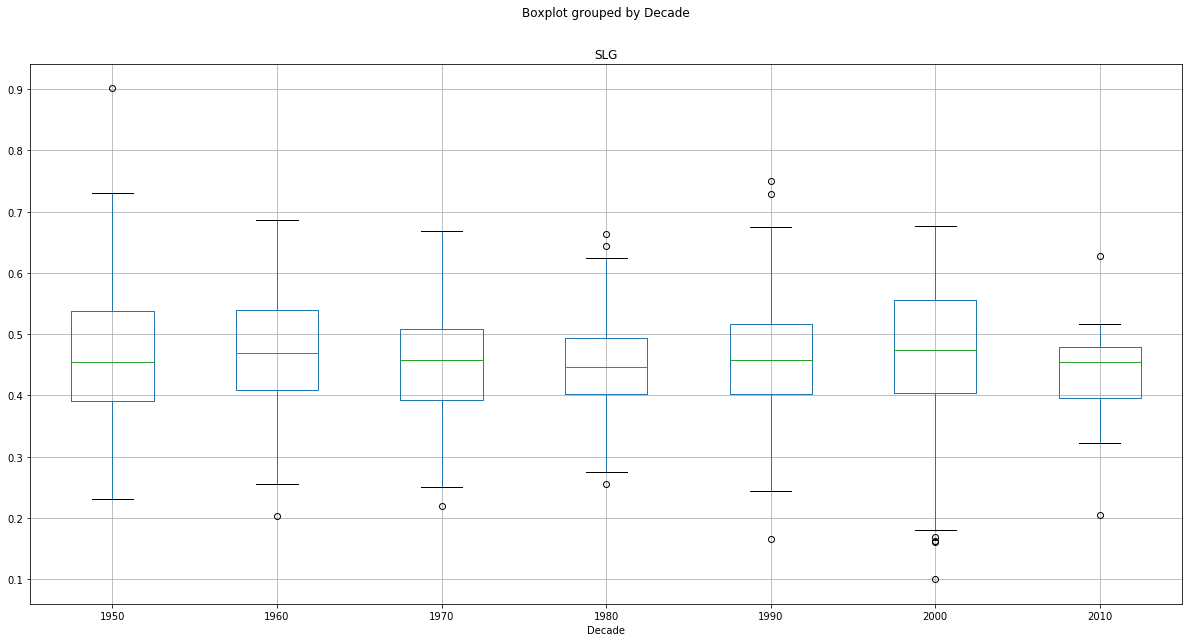

In [76]:
HOF_Batting.boxplot("SLG", by="Decade", figsize=(20, 10))
plt.savefig('Output/slg_box.png')

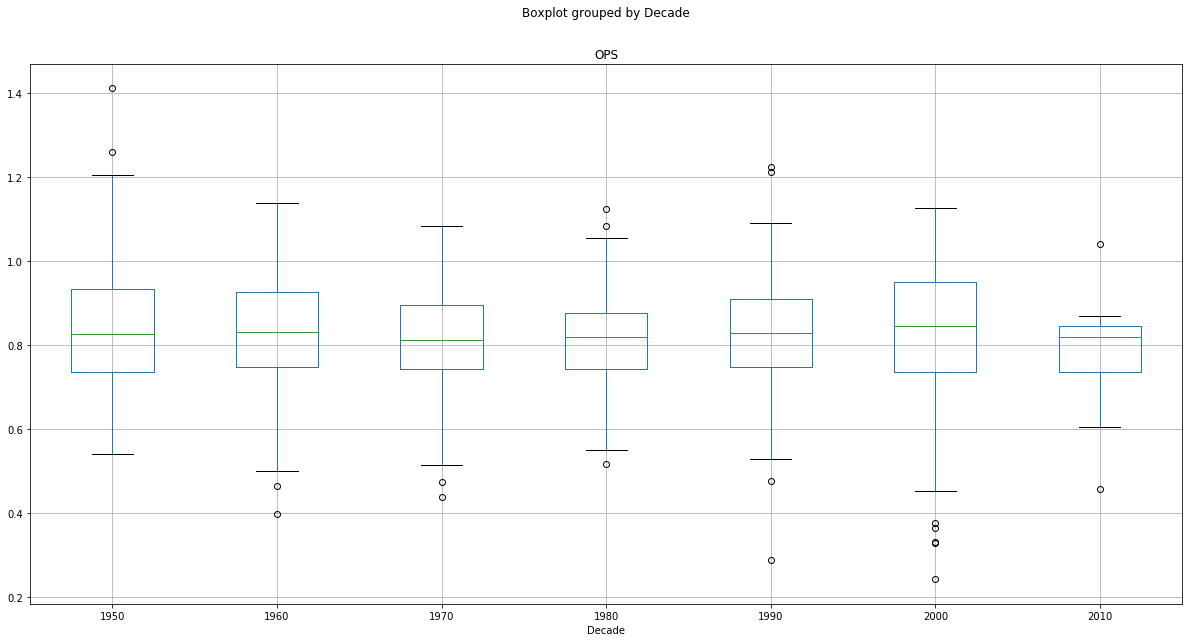

In [77]:
HOF_Batting.boxplot("OPS", by="Decade", figsize=(20, 10))
plt.savefig('Output/ops_box.png')

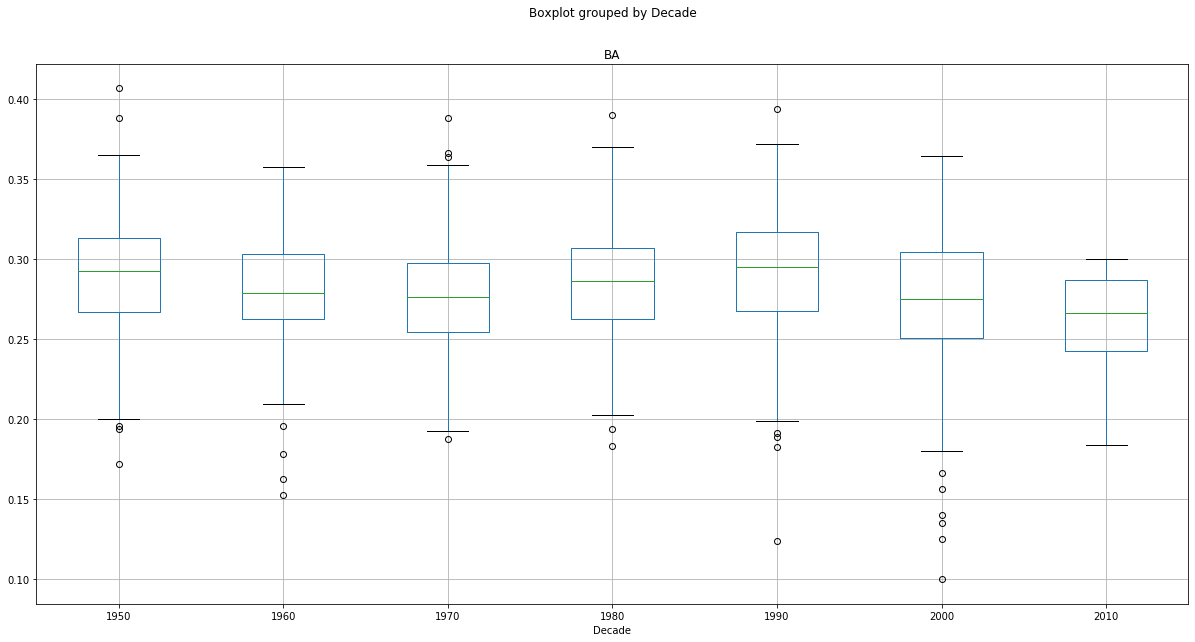

In [78]:
HOF_Batting.boxplot("BA", by="Decade", figsize=(20, 10))
plt.savefig('Output/ba_box.png')

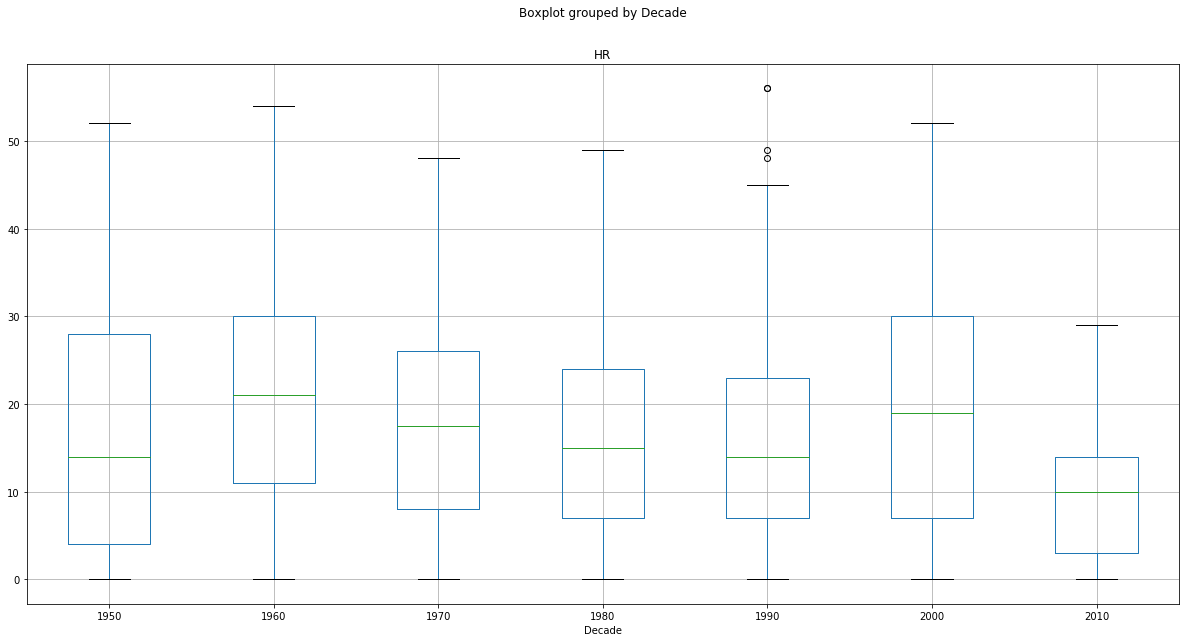

In [79]:
HOF_Batting.boxplot("HR", by="Decade", figsize=(20, 10))
plt.savefig('Output/hr_box.png')

# Chi Squared Test
## To see representation from each decade in the Hall of Fame
### Since player's HOF careers often span across multiple decades they dont belong to any single decade and count them for each decade they played in. We see no reason for the errors to not be normally distributed here so this is a good proxy for HOF representation. We exclude 2000 and 2010 because many of the players that will be inducted have not been for a number of reasons.

In [30]:
#Using GroupBy decade to get the number of unique players that played in each decade
HOF_per_decade= HOF_Batting.groupby(['Decade']).agg({
             'playerID': 'nunique'}).reset_index()
HOF_per_decade

,Decade,playerID
0,1950,37
1,1960,32
2,1970,36
3,1980,31
4,1990,29
5,2000,16
6,2010,5


In [31]:
#Rename Columns amd insert expected # of HOF players per decade (Sum/# Of decades)*Excluding 2000 and 2010
HOF_per_decade.set_index('Decade', inplace=True)
HOF_per_decade.rename(columns={'playerID': 'HOF Count'}, inplace=True)
HOF_per_decade['Expected'] = 33
#Drop 2000 and 2010 from df and create a new df for our final df
select_HOF_per_decade = HOF_per_decade.drop(['2000', '2010'])
select_HOF_per_decade

,HOF Count,Expected
Decade,,
1950,37,33
1960,32,33
1970,36,33
1980,31,33
1990,29,33


In [32]:
#Calculate the critical value for Chi Squared test with df = 4 (5 decades)
critical_value = stats.chi2.ppf(q = 0.95, df = 4)
critical_value

9.487729036781154

In [33]:
#Run Chi Squared Test
stats.chisquare(select_HOF_per_decade['HOF Count'], select_HOF_per_decade['Expected'])

Power_divergenceResult(statistic=1.393939393939394, pvalue=0.8452476922112548)

# Chi Squared Findings
* Critical value = 9.488, Statistic = 1.621, P-Value = 0.805
* There is no significant difference in HOF representation across the decades. Though the 90s has a lower than expected number of HOF players, likely due to steroid controversy surrounding the best players.
* We Exlude the 2000s and 2010s because many players that will be inducted simply have not gotten there yet due to the ballot process and wait that most players must go through to be inducted.

# Do Hall of Famers Change their performance in the postseason?
*Calculate aggreagate stats for HOF and HOF Post and then do students T tests to see if they are different
*Do the same for all players
*SLG%

In [94]:
#Extract Stat Columns so we can run t-tests 
#Hall of fame players
HOF_Slugging = HOF_Batting['SLG'].values
HOF_Post_Slugging = HOF_Post_Batting['SLG'].values
HOF_BA = HOF_Batting['BA'].values
HOF_Post_BA = HOF_Post_Batting['BA'].values
#All Players
Reg_Slugging = Reg_Batting['SLG'].values
Reg_Post_Slugging = Post_Batting['SLG'].values
Reg_BA = Reg_Batting['BA'].values
Reg_Post_BA = Post_Batting['BA'].values

In [93]:
#Get the means of stat columns so we can do some comparisons and illustrations
#Hall of fame players
M_HOF_Slugging = HOF_Batting['SLG'].mean()
M_HOF_Post_Slugging = HOF_Post_Batting['SLG'].mean()
M_HOF_BA = HOF_Batting['BA'].mean()
M_HOF_Post_BA = HOF_Post_Batting['BA'].mean()
#All Players
M_Reg_Slugging = Reg_Batting['SLG'].mean()
M_Reg_Post_Slugging = Post_Batting['SLG'].mean()
M_Reg_BA = Reg_Batting['BA'].mean()
M_Reg_Post_BA = Post_Batting['BA'].mean()

In [36]:
stats.ttest_ind(HOF_Slugging, HOF_Post_Slugging, equal_var=False)

Ttest_indResult(statistic=2.679575039646556, pvalue=0.007644108577467748)

In [37]:
stats.ttest_ind(HOF_BA, HOF_Post_BA, equal_var=False)

Ttest_indResult(statistic=2.853292037667471, pvalue=0.00453513265488836)

In [38]:
stats.ttest_ind(Reg_Slugging, Reg_Post_Slugging, equal_var=False)

Ttest_indResult(statistic=6.574684091419443, pvalue=5.208054259418868e-11)

In [39]:
stats.ttest_ind(Reg_BA, Reg_Post_BA, equal_var=False)

Ttest_indResult(statistic=10.352468467239067, pvalue=6.058649995734267e-25)

In [40]:
#Calculating differences between various stats to illustrate changes in performance
SLG_DIF = [M_HOF_Slugging, M_HOF_Post_Slugging, M_Reg_Slugging,M_Reg_Post_Slugging]
BA_DIF = [M_HOF_BA, M_HOF_Post_BA, M_Reg_BA, M_Reg_Post_BA]
HOF_SLG_DIF = M_HOF_Post_Slugging - M_HOF_Slugging 
HOF_BA_DIF = M_HOF_Post_BA - M_HOF_BA
REG_SLG_DIF = M_Reg_Post_Slugging - M_Reg_Slugging
REG_BA_DIF = M_Reg_Post_BA - M_Reg_BA
HOF_SLG_DIF, HOF_BA_DIF,REG_SLG_DIF, REG_BA_DIF
DIFS= [HOF_SLG_DIF, REG_SLG_DIF, HOF_BA_DIF, REG_BA_DIF]

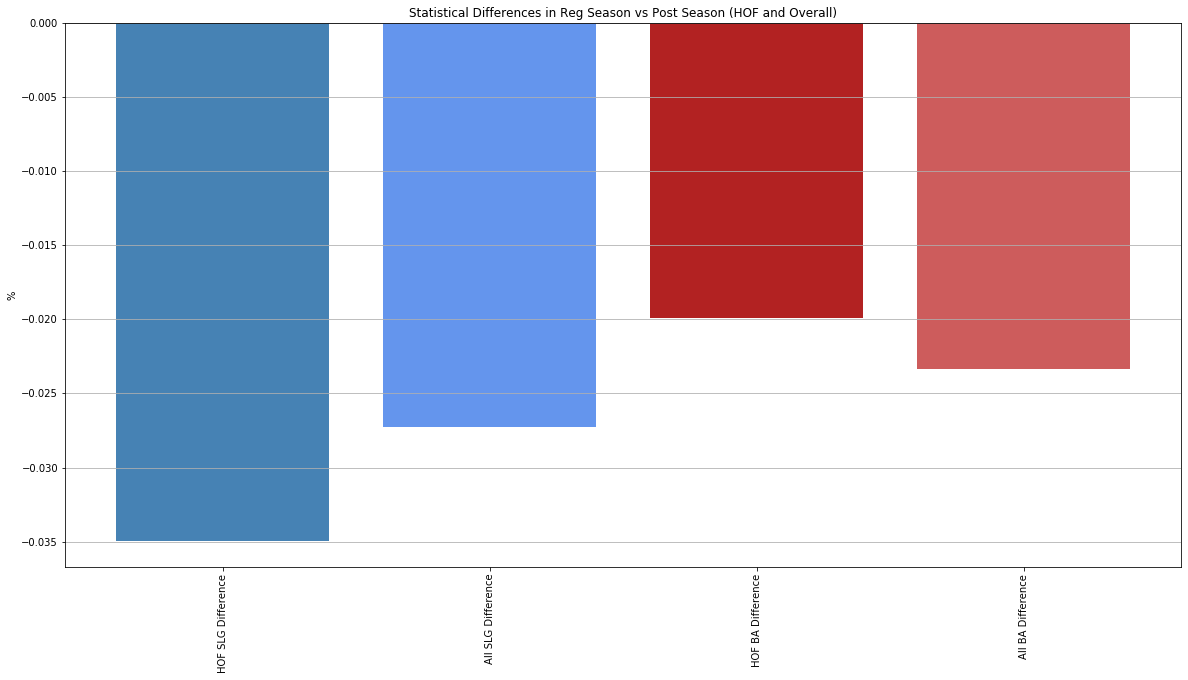

In [92]:
#Bar Chart for BA and SLG differences between HOF and All players in regular season vs post-season
DIFS_labels = ["HOF SLG Difference",  "All SLG Difference", "HOF BA Difference", "All BA Difference" ]
DIFS_x_axis = np.arange(len(DIFS))
DIFS_plot = plt.bar(DIFS_x_axis, DIFS, color=['steelblue','cornflowerblue','firebrick','indianred'], align="center")
tick_locations = [value for value in DIFS_x_axis]
plt.xticks(tick_locations, DIFS_labels, rotation = 'vertical')
plt.title("Statistical Differences in Reg Season vs Post Season (HOF and Overall)")
plt.ylabel("%")
plt.grid(b=None, which='major', axis='y')
plt.savefig('Output/playoff_dif.png')

# Findings: Changes in player performance Regular Season to Post-Season
* Hall Of Fame players Slugging Percentage and Batting Averages are statistically significantly worse in the post season than the regular season
* All players Slugging Percentage and Batting averages are statistically significantly worse in the post season than the regular season
* The decrease in Hall of Famers' stats in the post season is greater than that of All players

# Make Stacked Bar Charts

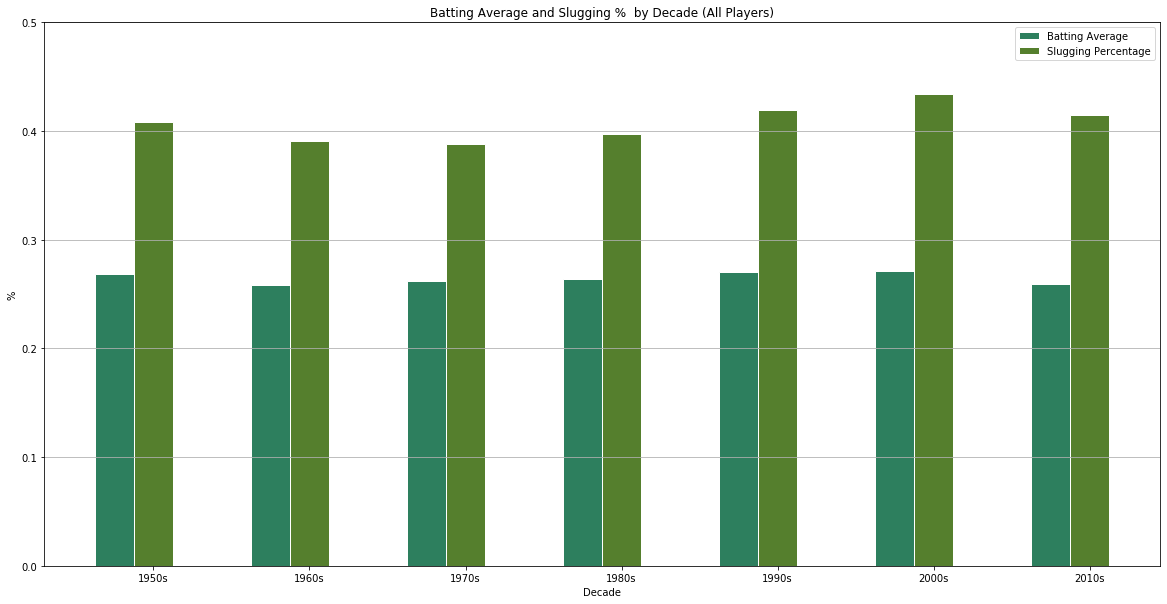

In [89]:
#multiple bar chart for All Players
decade_reg_batting = [0.268, 0.258, 0.262, 0.264, 0.270, 0.271, 0.259]
decade_reg_slugging = [0.408, 0.391, 0.388, 0.397, 0.419, 0.434, 0.415]

# set width of bar
barWidth = 0.25
 
# Set position of bar on X axis
r1 = np.arange(len(decade_reg_batting))
r2 = [x + barWidth for x in r1]

 
# Make the plot
plot = [plt.bar(r1, decade_reg_batting, color='#2d7f5e', width=barWidth, edgecolor='white', label='Batting Average'),
        plt.bar(r2, decade_reg_slugging, color='#557f2d', width=barWidth, edgecolor='white', label='Slugging Percentage')]
 
# Add xticks on the middle of the group bars
plt.xlabel('Decade')
plt.xticks([r + barWidth for r in range(len(decade_reg_batting))], ['1950s', '1960s', '1970s', '1980s', '1990s','2000s','2010s'])
plt.yticks(np.arange(0, .6, step=0.1))
plt.grid(b=None, which='major', axis='y')

# Create legend & Show graphic
plt.legend()
plt.ylabel('%')
plt.title("Batting Average and Slugging %  by Decade (All Players)")
plt.rcParams["figure.figsize"] = (20,10)
plt.savefig('Output/all_multbar.png')


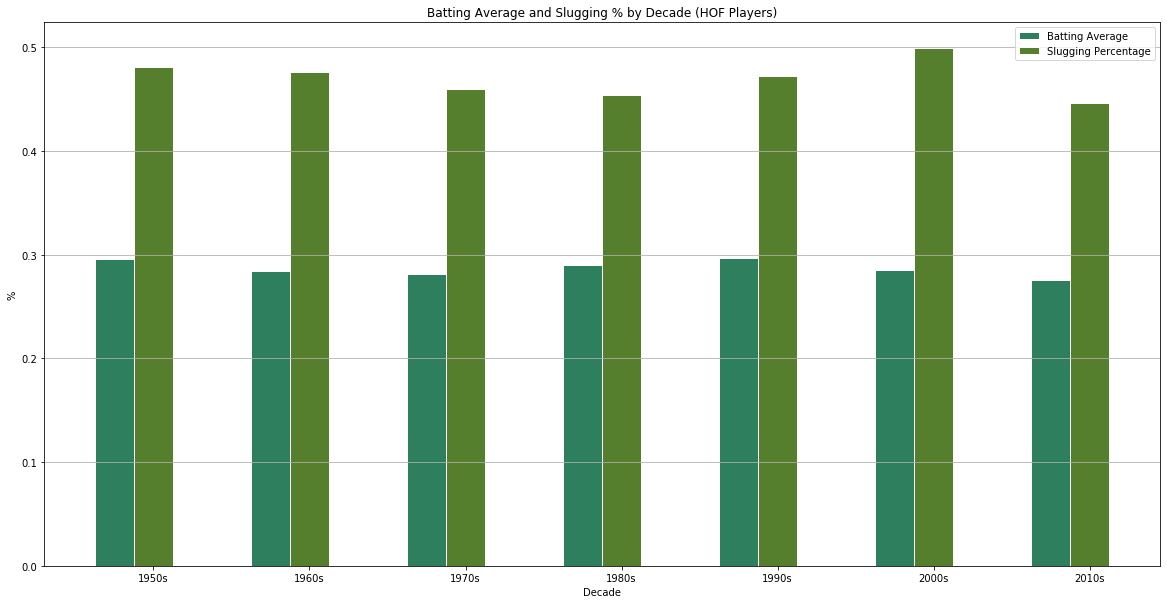

In [88]:
#multiple bar chart for HOF Players
decade_HOF_BA = [0.296, 0.284, 0.281, 0.290, 0.297, 0.285, 0.275]
decade_reg_slugging = [ 0.481, 0.476, 0.460, 0.454, 0.472, 0.499, 0.446]

# set width of bar
barWidth = 0.25
 
# Set position of bar on X axis
r1 = np.arange(len(decade_reg_batting))
r2 = [x + barWidth for x in r1]

 
# Make the plot
plot = [plt.bar(r1, decade_HOF_BA, color='#2d7f5e', width=barWidth, edgecolor='white', label='Batting Average'),
        plt.bar(r2, decade_reg_slugging, color='#557f2d', width=barWidth, edgecolor='white', label='Slugging Percentage')]
 
# Add xticks on the middle of the group bars
plt.xlabel('Decade')
plt.xticks([r + barWidth for r in range(len(decade_reg_batting))], ['1950s', '1960s', '1970s', '1980s', '1990s','2000s','2010s'])
plt.yticks(np.arange(0, .6, step=0.1))
plt.grid(b=None, which='major', axis='y')

# Create legend & Show graphic
plt.legend()
plt.ylabel('%')
plt.title("Batting Average and Slugging % by Decade (HOF Players)")
plt.rcParams["figure.figsize"] = (20,10)
plt.savefig('Output/HOF_multbar.png')